<a href="https://colab.research.google.com/github/schumbar/CMPE297/blob/main/assignment_05/ShawnChumbar_Assignment05_PartE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 05 Part E - Bitcoin Price Prediction

## Assignment Description
Develop a Colab that uses TimeGPT to predict Bitcoin prices. Provide detailed explanations and analysis of the results.

### References
1. [Bitcoin price prediction](https://docs.nixtla.io/docs/use-cases-bitcoin_price_prediction)


## Bitcoin Price Prediction

### Import Necessary Libraries

In [17]:
!pip install -Uqq nixtla cryptocmd

In [18]:
import pandas as pd
from nixtla import NixtlaClient
from nixtla.utils import in_colab
from google.colab import userdata
NIXTLA_API_KEY = userdata.get('NIXTLA_API_KEY')

In [19]:
IN_COLAB = in_colab()

In [20]:
nixtla_client = NixtlaClient(
    api_key = NIXTLA_API_KEY
)

### Introduction

**Outline:**

1. [Load Bitcoin Price Data](#load-bitcoin-price-data)

2. [Get Started with TimeGPT](#get-started-with-timegpt)

3. [Visualize the Data](#visualize-the-data)

4. [Forecast with TimeGPT](#forecast-with-timegpt)

5. [Extend Bitcon Price Analysis with TimeGPT](#extend-bitcoin-price-analysis-with-timegpt)

6. [Understand the Model's Limitations](#understand-the-models-limitations)

7. [References and Additional Material](#references-and-additional-material)

### Load Bitcoin Price Data

First download the historical Bitcoin price data in USD as a `pandas` DataFrame.

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/bitcoin_price_usd.csv', sep=',')
df.head()

,Date,Close
0,2020-01-01,7200.174316
1,2020-01-02,6985.470215
2,2020-01-03,7344.884277
3,2020-01-04,7410.656738
4,2020-01-05,7411.317383


The dataset contains the closing price of Bitcoin in USD from 2020-01-01 to 2023-12-31. It's important to note that unlike traditional financial assets, Bitcoin trades 24/7. Thus, the closing price represents the price of Bitcoin at a specific time each day, rather than at the end of a trading day.

In [22]:
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

### Get Started with TimeGPT

To get started with `TimeGPT`, we instantiate the `NixtlaClient` class, which requires a Nixtla API key.

In [23]:
from nixtla import NixtlaClient

In [24]:
nixtla_client = NixtlaClient(
    api_key = NIXTLA_API_KEY
)

To learn more about how to set up your API key, please refer to the [Setting Up Your Authentication API Key](https://docs.nixtla.io/docs/getting-started-setting_up_your_api_key) tutorial.

### Visualize the Data

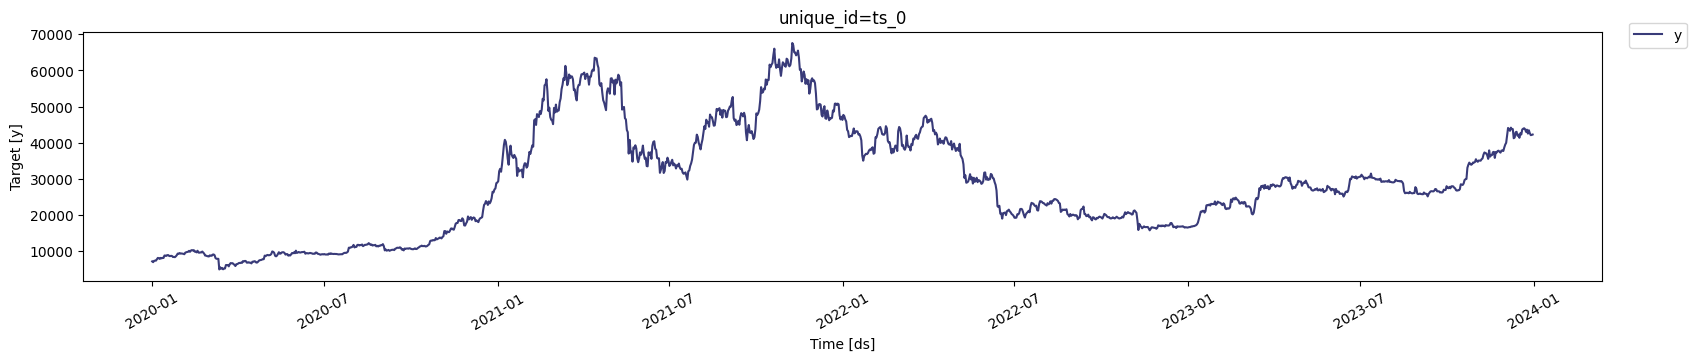

In [25]:
nixtla_client.plot(df)

### Forecast with TimeGPT

Now we generate predictions with TimeGPT. To do this, we will use the `forecast` method from the `NixtlaClient` class.

The `forecast` method requires the following arguments:

- `df`: The DataFrame containing the time series data

- `h`: (int) The forecast horizon. In this case, we will forecast the next 7 days.

- `level`: (list) The confidence level for the prediction intervals. Given the inherent volatility of Bitcoin, we will use multiple confidence levels.

In [26]:
level = [50,80,90] # confidence levels

fcst = nixtla_client.forecast(df, h=7, level=level)
fcst.head()

,ds,TimeGPT,TimeGPT-hi-50,TimeGPT-hi-80,TimeGPT-hi-90,TimeGPT-lo-50,TimeGPT-lo-80,TimeGPT-lo-90
0,2024-01-01,42269.460,43158.094,44109.047,44971.656,41380.830,40429.875,39567.266
1,2024-01-02,42469.918,43473.383,44361.484,45241.867,41466.453,40578.350,39697.970
2,2024-01-03,42864.080,43443.870,44141.914,45189.230,42284.285,41586.242,40538.926
3,2024-01-04,42881.620,43704.855,44547.176,45160.023,42058.387,41216.066,40603.220
4,2024-01-05,42773.457,44057.190,44881.523,45333.160,41489.723,40665.390,40213.754


We can pass the forecasts we just generated to the `plot` method to visualize the predictions with the historical data.  

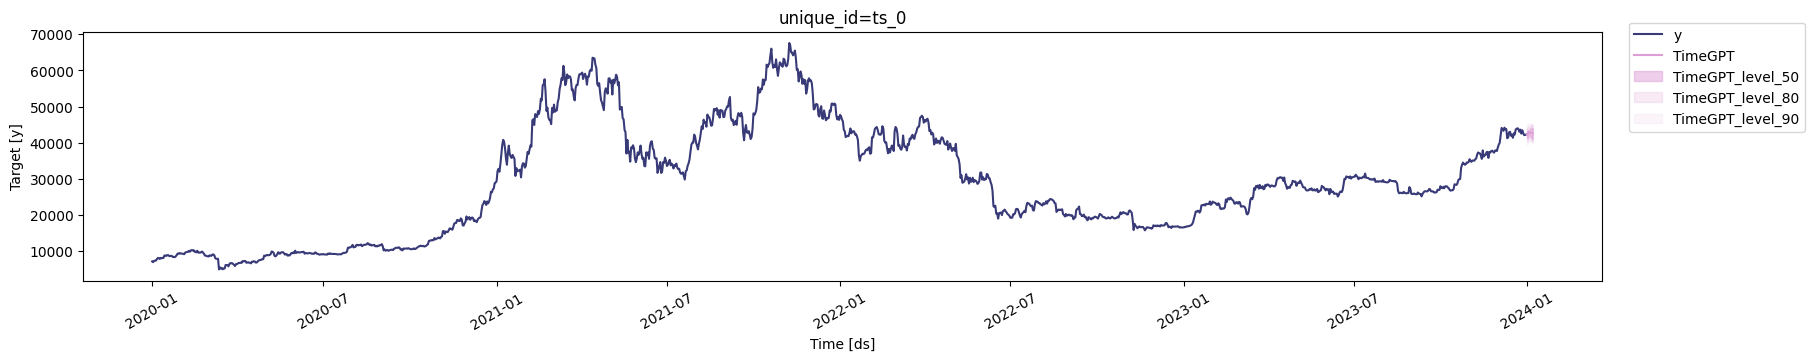

In [27]:
nixtla_client.plot(df, fcst, level=level)

To get a closer look at the predictions, we can zoom in on the plot or specify the maximum number of in-sample observations to be plotted using the `max_insample_length` argument. Note that setting `max_insample_length=60`, for instance, will display the last 60 historical values along with the complete forecast.  

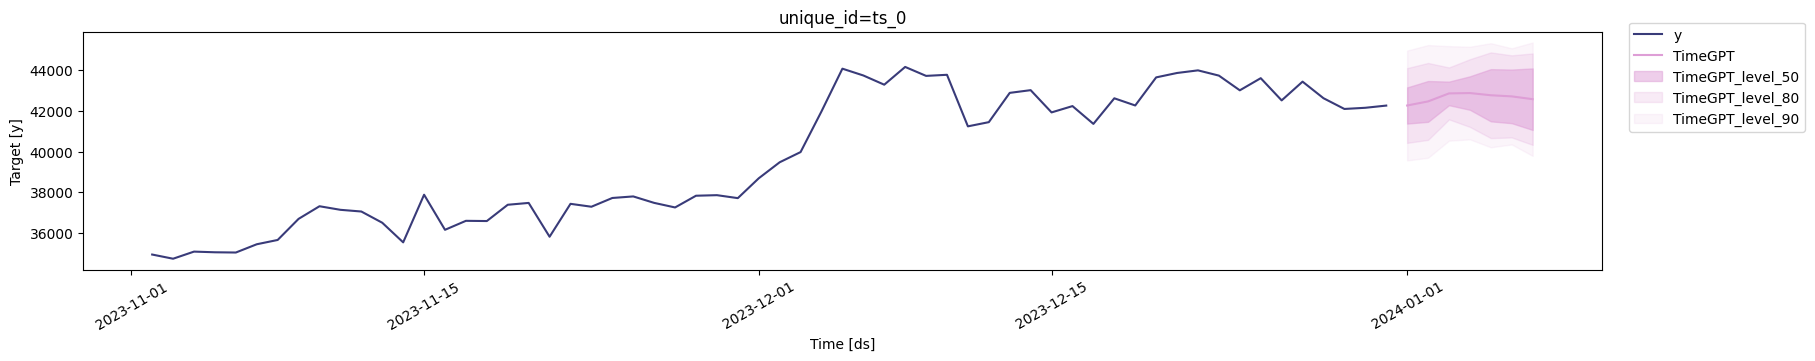

In [28]:
nixtla_client.plot(df, fcst, level=level, max_insample_length=60)

Additionally, if you set the `add_history` argument of the `forecast` method to `True`, `TimeGPT` will generate predictions for the historical observations too. This can be useful for assessing the model's performance on the training data.

In [29]:
forecast = nixtla_client.forecast(df, h=7, level=level, add_history=True)
forecast.head()

,ds,TimeGPT,TimeGPT-hi-50,TimeGPT-hi-80,TimeGPT-hi-90,TimeGPT-lo-50,TimeGPT-lo-80,TimeGPT-lo-90
0,2020-02-03,9425.707,11229.300,12852.590,13824.064,7622.1140,5998.8237,5027.3500
1,2020-02-04,9568.495,11372.088,12995.378,13966.853,7764.9020,6141.6120,5170.1380
2,2020-02-05,9557.106,11360.699,12983.989,13955.464,7753.5130,6130.2230,5158.7495
3,2020-02-06,9486.127,11289.720,12913.010,13884.484,7682.5337,6059.2437,5087.7700
4,2020-02-07,9475.245,11278.838,12902.128,13873.603,7671.6520,6048.3620,5076.8880


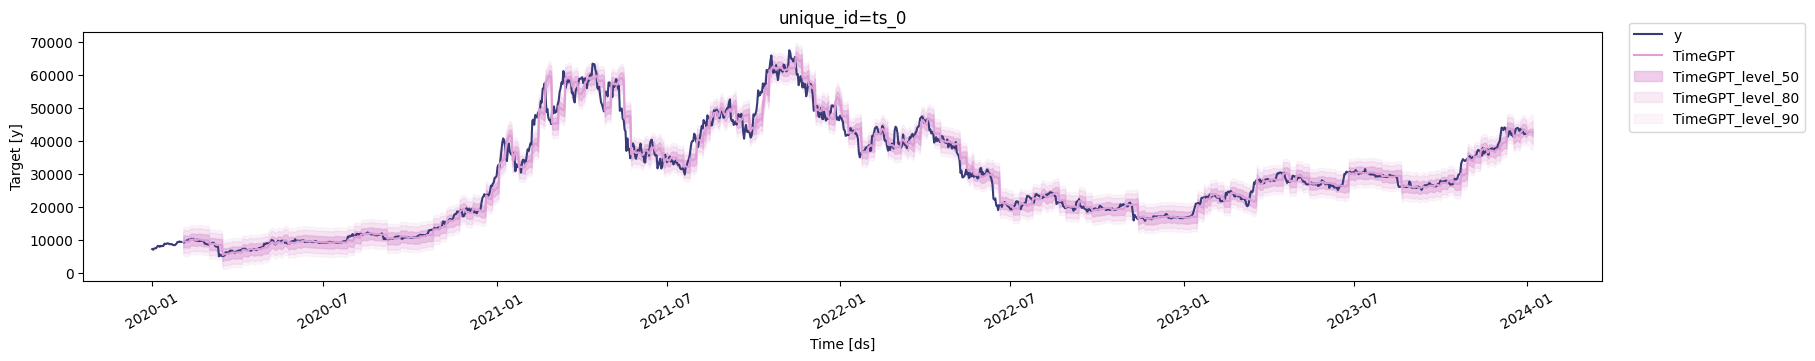

In [30]:
nixtla_client.plot(df, forecast, level=level)

### Extend Bitcoin Price Analysis with TimeGPT

### Anomaly Detection

`TimeGPT` can be used for anomaly detection by calling the `detect_anomalies` method from the `NixtlaClient` class. This method evaluates each observation against its context within the series, using statistical measures to determine its likelihood of being an anomaly. By default, it identifies anomalies based on a 99 percent prediction interval. To change this, you can specify the `level` argument.

In [31]:
anomalies_df = nixtla_client.detect_anomalies(df)

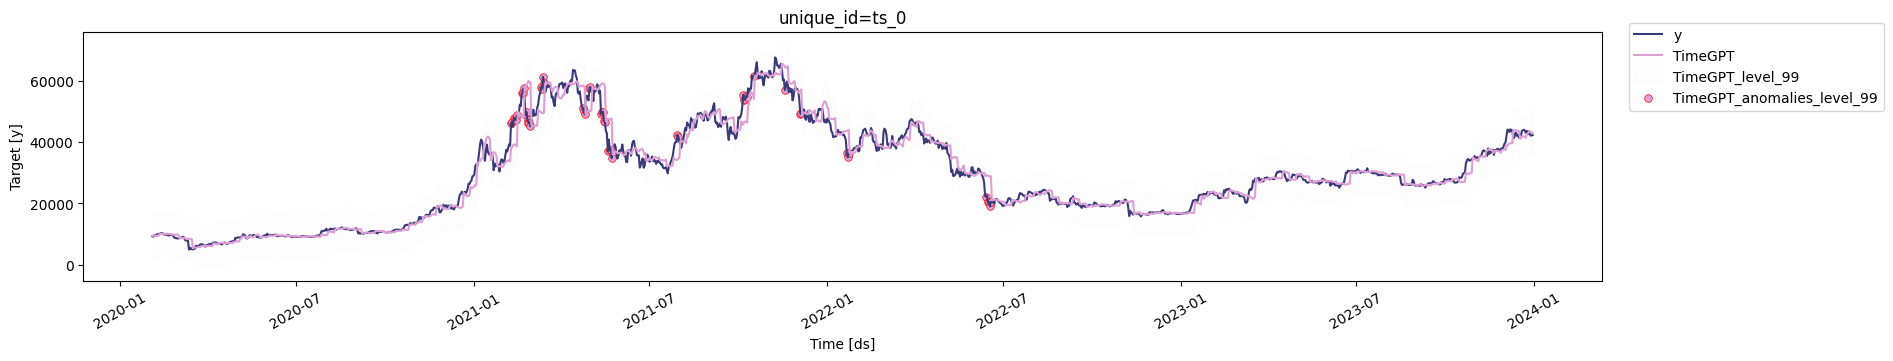

In [32]:
nixtla_client.plot(df, anomalies_df, plot_anomalies=True)

### Model Limitations

Predicting the future prices of financial assets is a challenging task, especially for assets like Bitcoin. The predictions in this tutorial may appear accurate, mainly because they align with recent historical data and the model updates with new values at short intervals, avoiding significant deviations.

However, the true challenge lies in forecasting Bitcoin's price for the upcoming days, not just its historical performance. For those who need or want to try to forecast these assets, `TimeGPT` can be an option that simplifies the forecasting process. With just a couple of lines of code, `TimeGPT` can help you:

- Produce point forecasts
- Quantify the uncertainty of your predictions
- Produce in-sample forecasts
- Detect anomalies
- Incorporate exogenous variables